### Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [11]:
import warnings
warnings.filterwarnings("ignore")

### Data Collection

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

### Data Preprocessing

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

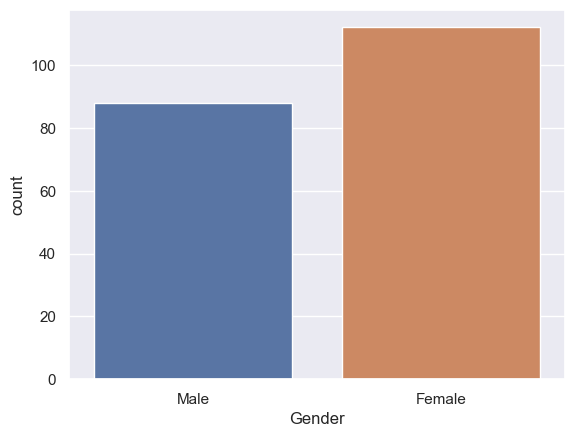

In [9]:
sns.countplot(x = 'Gender',data = data)

<Figure size 600x600 with 0 Axes>

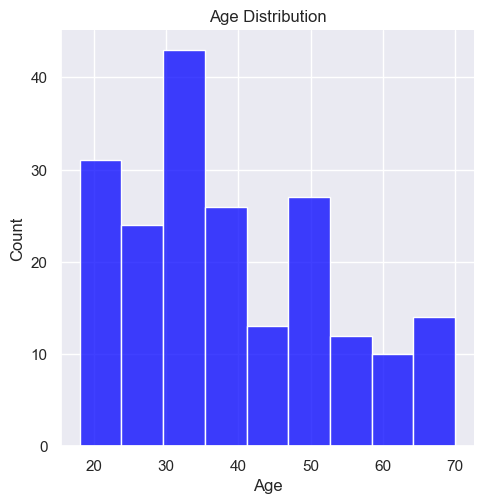

In [24]:
plt.figure(figsize = (6,6))
sns.displot(data['Age'],color = 'blue')
plt.title("Age Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

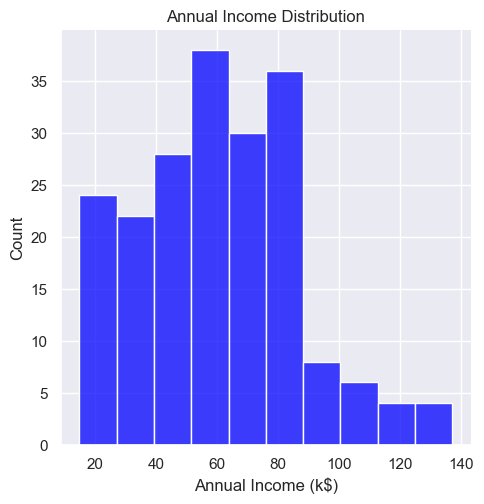

In [23]:
plt.figure(figsize = (6,6))
sns.displot(data['Annual Income (k$)'],color = 'blue')
plt.title("Annual Income Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

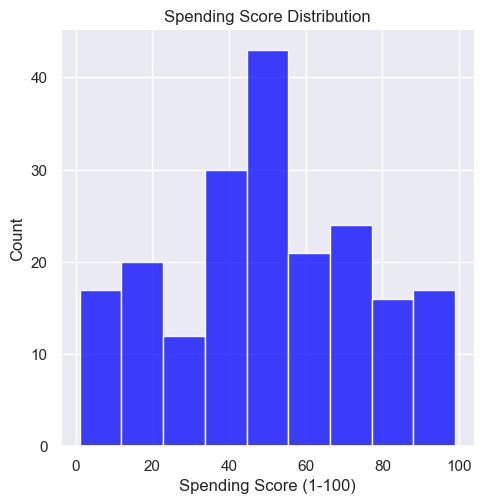

In [29]:
plt.figure(figsize = (6,6))
sns.displot(data['Spending Score (1-100)'],color = 'blue')
plt.title("Spending Score Distribution")
plt.show()

In [35]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
def label_encoder(df):
    le = LabelEncoder()
    for col in df.columns:
        if data[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
            
    return df

In [37]:
data = label_encoder(data)

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [39]:
# so 1 for Male & 0 for Female.

### Optimum Number of Clusters

In [43]:
X = data.drop('CustomerID',axis = 1).values

In [46]:
X[:3]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6]], dtype=int64)

In [47]:
# WCSS -> Within Cluster Sum of Squares

In [51]:
wcss = []
for x in range(1,11):
    kmeans = KMeans(n_clusters=x,init='k-means++',max_iter=500,random_state=33)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [53]:
# Ploting Elbow Point Graph

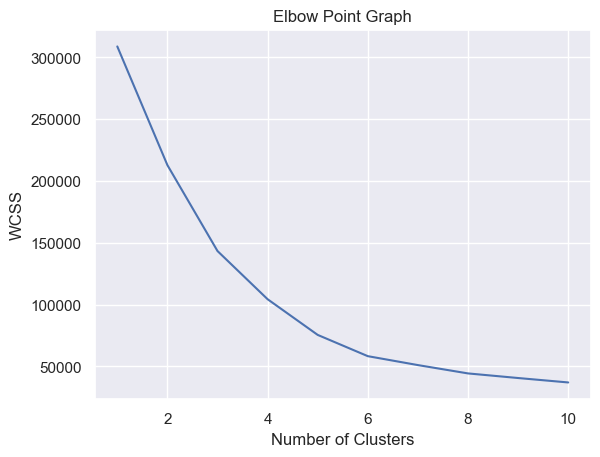

In [54]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [55]:
# Optimum Number of Clusters = 5

### Training K-Means Clustering Model

In [58]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=500,random_state=0)
Y = kmeans.fit_predict(X)

In [59]:
Y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

### Clusters Visualization

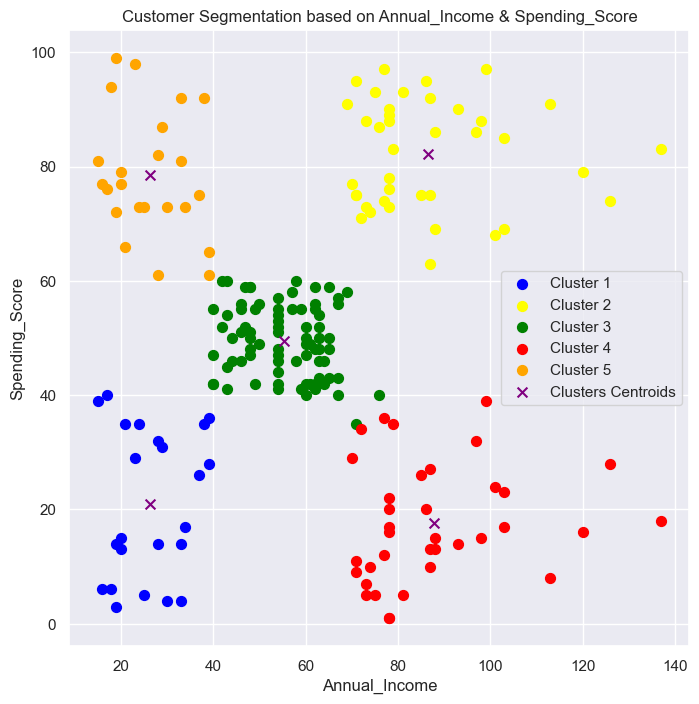

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,2],X[Y==0,3],s=50,c='blue',label='Cluster 1')
plt.scatter(X[Y==1,2],X[Y==1,3],s=50,c='yellow',label='Cluster 2')
plt.scatter(X[Y==2,2],X[Y==2,3],s=50,c='green',label='Cluster 3')
plt.scatter(X[Y==3,2],X[Y==3,3],s=50,c='red',label='Cluster 4')
plt.scatter(X[Y==4,2],X[Y==4,3],s=50,c='orange',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],marker = 'x',s=50,c='purple',label='Clusters Centroids')
plt.title('Customer Segmentation based on Annual_Income & Spending_Score')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.legend()
plt.show()